# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This DataBase Contains information such as popularity, revenues, votes, budget and more on around 5000 movies.

Full list of Columns Contained in the DataBase: 

       'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'
       
where revenue_adj and budget_adj are values in dollar adjusted according to inflation rates

### Question(s) for Analysis
Q1 What are the most popular genre on a each year ?.

Q2 What is the trend of popularity for each genre over the years ?

Q3 How the Number of Movies Produced Changed Over The Years ?

Q4 What kinds of properties are associated with movies that have high revenues?


In [1]:
import random as rand
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('tmdb.csv')
df.duplicated().sum()

1

Removing 1 Duplicate Row

In [3]:

df.drop_duplicates(inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       


### Data Cleaning

In [5]:
df.drop(['homepage', 'keywords', 'production_companies','overview'] ,axis = 1, inplace=True)

removed columns that would not be used in the analysis

<a id='eda'></a>
## Exploratory Data Analysis

### Q1 What are the most popular genre on a each year ?

To Answer this question we will start by getting rid of movies with no genre associated (null values in genre tag) Then we will be Splitting Each Movie Associated with multiple Genres into multiple rows in the dataframe, this is required to correctly identify popular genres

In [6]:
df_gen = df[df.genres.notna()]
df_gen.reset_index(drop=True, inplace=True)
adds = []
rems = []
for x in range(df_gen['genres'].size):
    if ("|" in df_gen['genres'][x]):
        genlst = df_gen['genres'][x].split("|")
        rems.append(x)
        row = df_gen.iloc[x, :].copy()
        for gen in genlst:
            tmp = row.copy()
            tmp['genres'] = gen
            adds.append(tmp.values)

df_gen.drop(rems, inplace=True)
adds = pd.DataFrame(adds, columns = df.columns)
df_gen = df_gen.append(adds)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
rel = df_gen.groupby(['release_year', 'genres']).median()['popularity'].unstack()
rel.fillna(0, inplace = True)
rel.max(axis=1)
popyear = rel.idxmax(axis=1)
mostpop = pd.DataFrame(popyear.values, index = popyear.index)
mostpop.transpose()

release_year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Romance,Animation,Adventure,Animation,Family,Music,Fantasy,Animation,Mystery,Crime,...,History,Mystery,Adventure,Adventure,Adventure,Western,Fantasy,Crime,Western,Adventure


In the last cell we display a list of the most popular genre in each year

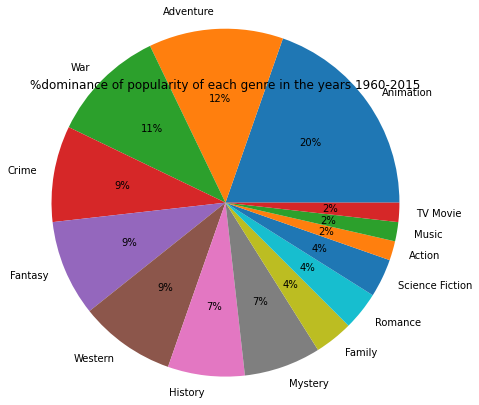

In [8]:
lbls = [x[0] for x in mostpop.value_counts().index.values]
plt.pie(mostpop.value_counts(), labels = lbls, radius=2, autopct='%1.0f%%');
plt.title('%dominance of popularity of each genre in the years 1960-2015');

<font size ="4"> Exploring These Variables could give film makers a good idea into what genre to choose to a have a potentially higher reach with bigger audiences

Here I used a Pie chart to give a good sense of the proportions,
from which we could see that 50% of the time (from 1960 to 2015) The Most Popular Genre in a year Was dominated by only 4 Genres </font>

### Q2 What is the trend of popularity for each genre over the years ?

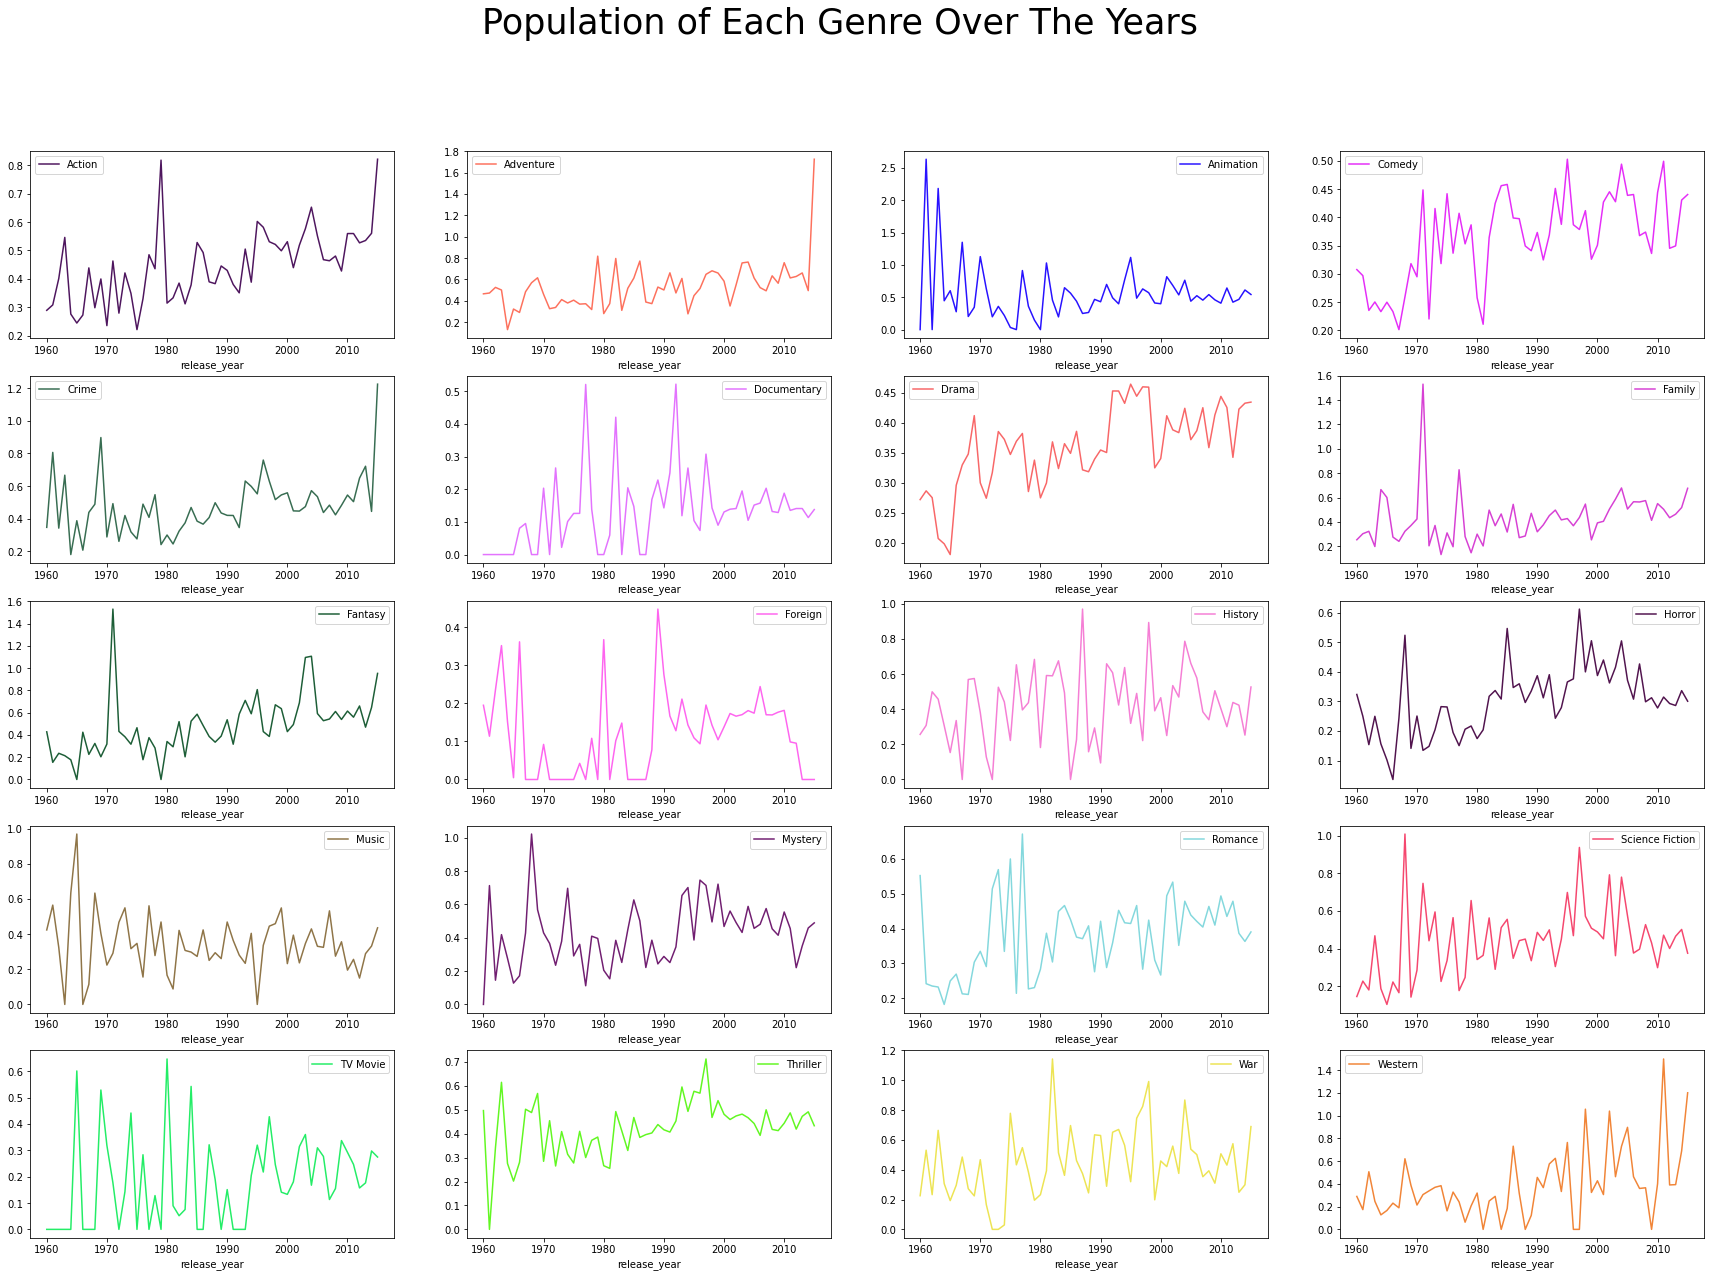

In [9]:
fig, ax = plt.subplots(5,4,figsize = (30,20))
fig.suptitle('Population of Each Genre Over The Years',fontsize = 35)
c = 0
for x in range(5):
    for y in range(4):
        rel.iloc[:,c].plot(legend=True, ax=ax[x][y], color = "#"+''.join(rand.choice('12345678DEF') for j in range(6)));
        c = c + 1


<font size ="4"> In this Grid of plots I used a line plot to see if a trend between a genre and year of release exist,
from it it seen that no such general trend exist or is easily spotted without the use of machine learning

If such a trend can be identified it would be very useful to report as it could suggest the best time to release a movie in a specific genre to maximize the potential popularity</font>

<font size="4"> Q3 How the Number of Movies Produced Changed Over The Years</font>

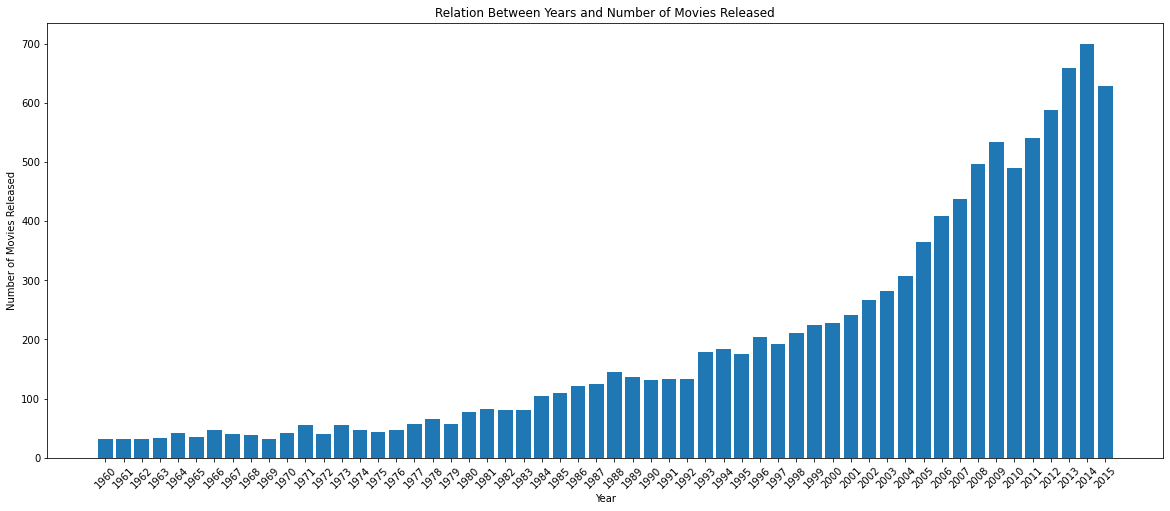

In [10]:
nper = df.groupby('release_year').count()['id']
plt.subplots(figsize=(20,8))
plt.bar(height = nper.values,x = np.arange(nper.size));
plt.xticks(np.arange(nper.size), nper.index, rotation=45)
plt.xlabel('Year');
plt.ylabel('Number of Movies Released');
plt.title('Relation Between Years and Number of Movies Released');

<font size ="4"> In this figure i used a bar plot to display the number of movies released in each year indisually as well as have a sense of comparison between them

this plot can help decision makers understand the potential compititors they would be expecting in a given year with the help of trendline</font>

<font size="4"> Q4 What kinds of properties are associated with movies that have high revenues?</font>

In [23]:
df.revenue.isna().sum()

0

ill define high revenue movies as ones in the 4th quartile or top 25% in revenue
here the second row from the bottom of the .describe() function is the one for the value wich is higher than 75% of the data which is the required value to query for the top 25% movies

In [12]:
## Investigating The Top 25% Movies in Revenue
tope = df.revenue_adj.describe()[-2]
df_highRev = df.query('revenue_adj >= @tope')
##df_highRev.info()

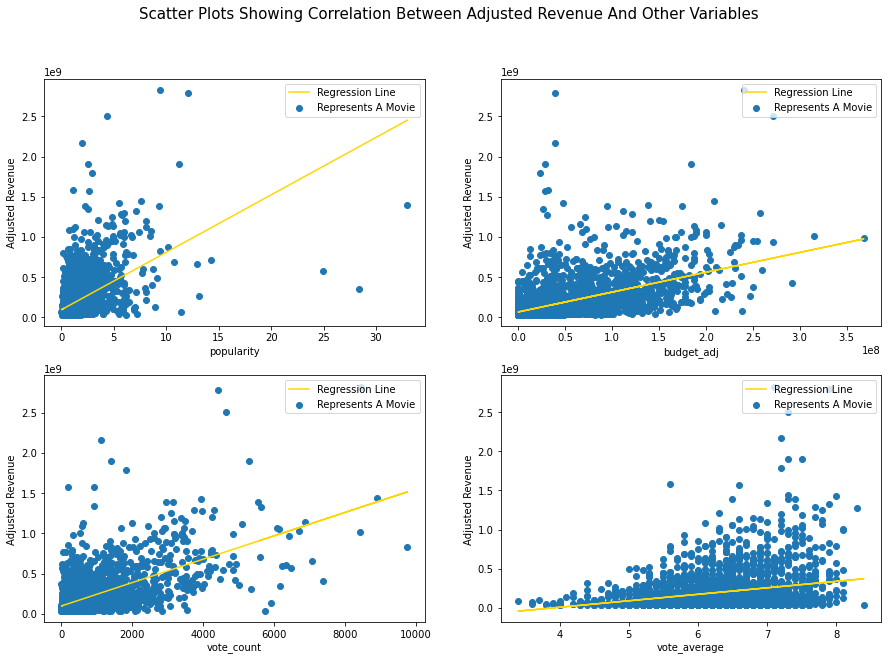

In [13]:
f,grd = plt.subplots(2,2,figsize=(15,10))

f.suptitle('Scatter Plots Showing Correlation Between Adjusted Revenue And Other Variables', fontsize=15)
xInterest = ['popularity', 'budget_adj', 'vote_count', 'vote_average']
xi = 0
for i in range(2):
    for j in range(2):
        grd[i][j].scatter(df_highRev[xInterest[xi]], df_highRev.revenue_adj)
        grd[i][j].set_xlabel(xInterest[xi])
        grd[i][j].set_ylabel('Adjusted Revenue')
        
        ##creating regression line
        m, b = np.polyfit(df_highRev[xInterest[xi]], df_highRev.revenue_adj,1)
        grd[i][j].plot(df_highRev[xInterest[xi]], df_highRev[xInterest[xi]]*m+b, color='gold')
        
        grd[i][j].legend(['Regression Line', 'Represents A Movie'], loc=1)
        ##grd[i][j].get_legend().legendHandles[0].set_color('gold')
        xi += 1


<font size="4"></font>

<font size="4"> Here we use a scatter plot along side a regression trendline to better understand the correlation between each variable selected and the adjusted revenue with the trendline helping in understanding the steepness or degree of correlation
as seen from the figure it seems that all of the variables have positive correlation with the revenue, from this multiple inferences and decisions could be made, such as that it might be a good decision to advertise or survey movie's watcher on the movie rating to attempt to increase the number of votes as both vote count and rating correlate with the revenue </font>

<font size="4"> </font>

<font size="4">Now checking Revenue Relation with Genres and release year </font>

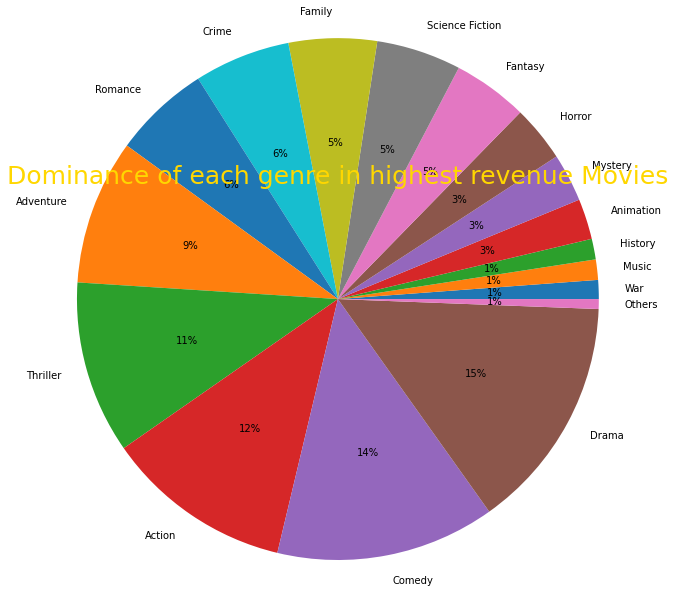

In [21]:
df_gnr = df_gen
tope = df_gnr.revenue_adj.describe()[-2]
df_gnr = df_gnr.query('revenue_adj >= @tope')
gencount = df_gnr.groupby('genres').count()['revenue_adj'].sort_values()
## packing genres which contributions approx to 0% into a group others
gencount['Others'] = gencount['Foreign'] + gencount['TV Movie'] + gencount['Documentary'] + gencount['Western']
gencount.drop(['Foreign', 'TV Movie', 'Documentary', 'Western'], inplace = True)
plt.pie(gencount.values, labels = gencount.index, radius = 3, autopct='%1.0f%%', labeldistance=1.1);
plt.title('Dominance of each genre in highest revenue Movies', color = 'gold', size =25);

<font size="4"> Here I used also used a Pie chart As its best to compare these variables in percentages to understand proportions of dominance of each genre in the list relative to each other

From this we can infer that it might not be a good idea to invest a great budget into a genre with a low proportion in the figure as its more likley for such genre to no have a high revenue
</font>

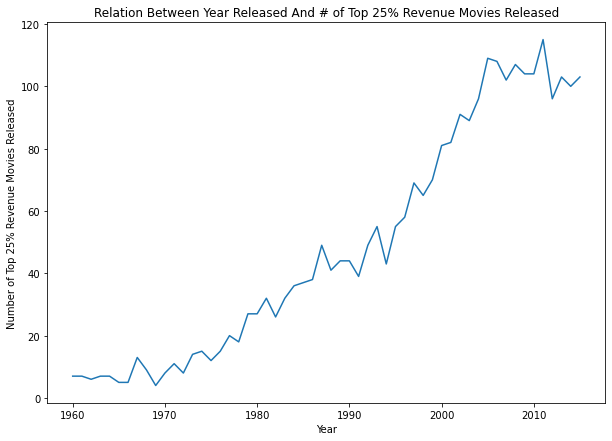

In [ ]:
countyr = df_highRev.groupby('release_year').count()['revenue_adj']
plt.subplots(figsize=(10,7))
plt.plot(countyr.index, countyr.values);
plt.xlabel('Year');
plt.ylabel('Number of Top 25% Revenue Movies Released');
plt.title('Relation Between Year Released And # of Top 25% Revenue Movies Released');

<font size="4"> Here i used a line plot to give a good sense of the trend.

The variables here are important for decision makers as it infers that the revenue of top movies have been growing over the years (compared to previous years) and this can infer that more people are getting more interested in watching/buying movies over the years. so this can justify increasing a movie budget to aim for bigger profits. </font>

<a id='conclusions'></a>
## Conclusions

1- Choosing The Right Genre Has a High Correlation on the movie popularity

2- Popularity of each genre fluctuates throughout the years with no long-term trends
   Number of Movies Made each year is on a steady rise

3-popularity, budget, vote count and average are all positevly correlated with the Revenue

4- Movie Genre has High influence on the Revenue with Drama, Comedy , Action and Thriller having the bigest share in the highest revenue Movies

5- The Year of Release is Highly Correlated To the Making of High Revenue Movies

### Limitations
No Statistical Tests have been used in the analysis

Additional Research could be done on the Multiple Columns in the DataSet that has been dropped out or not used in the analysis 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1